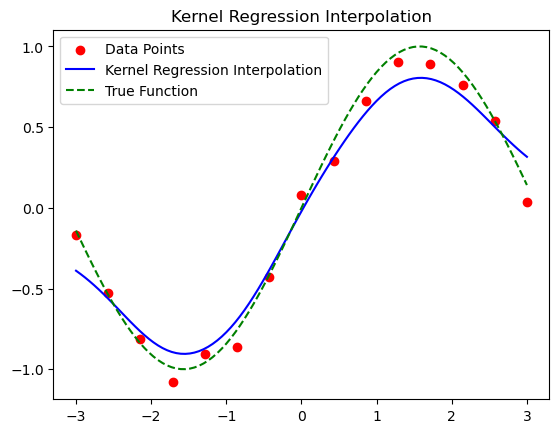

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组离散的观测数据
np.random.seed(41)
X = np.linspace(-3, 3, 15)  # 观测点
y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape)  # 真实函数带噪声

def gaussian_kernel(x, xi, h):
    """ 高斯核函数 """
    return np.exp(-((x - xi) ** 2) / (2 * h ** 2))

def kernel_regression(x_query, X, y, h):
    """ 核回归插值 """
    weights = np.array([gaussian_kernel(x_query, xi, h) for xi in X])  # 计算权重
    weights /= np.sum(weights)  # 归一化
    return np.sum(weights * y)  # 计算加权和

# 计算插值
h = 0.5  # 选择合适的带宽
X_interp = np.linspace(-3, 3, 100)  # 插值点
y_interp = np.array([kernel_regression(x, X, y, h) for x in X_interp])  # 计算插值值

plt.scatter(X, y, color='red', label="Data Points")  # 观测点
plt.plot(X_interp, y_interp, label="Kernel Regression Interpolation", color='blue')  # 插值结果
plt.plot(X_interp, np.sin(X_interp), '--', label="True Function", color='green')  # 真实函数
plt.legend()
plt.title("Kernel Regression Interpolation")
plt.show()

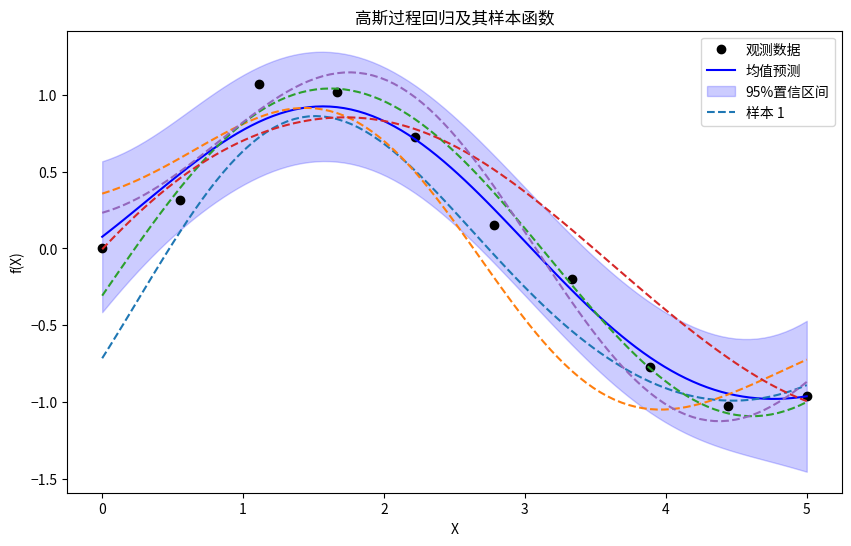

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Source Han Sans CN' # 中文字体, Windows: 'SimHei', Mac: 'Heiti TC'
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# 1. 准备训练数据
X_train = np.linspace(0, 5, 10).reshape(-1, 1)             # 10个观测点，X取0到5的均匀分布
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.1, 10)  # 目标值为正弦函数加上噪声

# 2. 创建并训练高斯过程回归模型
kernel = RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1)  # alpha 表示观测噪声水平
gp.fit(X_train, y_train)

# 3. 在新的输入点上进行预测
X_fine = np.linspace(0, 5, 100).reshape(-1, 1)             # 更细的输入网格
mean_prediction, std_prediction = gp.predict(X_fine, return_std=True)

# 4. 使用 gp.sample_y 抽取样本
n_samples = 5
# 返回的 f_samples 形状为 (len(X_fine), n_samples)，每一列是一个样本
f_samples = gp.sample_y(X_fine, n_samples)
f_samples = f_samples.T  # 转置后，每一行是一条完整的样本曲线

# 5. 绘图展示结果
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ko', label="观测数据")
plt.plot(X_fine, mean_prediction, 'b-', label="均值预测")
plt.fill_between(X_fine.ravel(), 
                 mean_prediction - 1.96 * std_prediction,
                 mean_prediction + 1.96 * std_prediction,
                 color='blue', alpha=0.2, label="95%置信区间")

# 绘制抽取的样本曲线
for i in range(n_samples):
    plt.plot(X_fine, f_samples[i], linestyle='--', label=f"样本 {i+1}" if i==0 else None)
plt.xlabel("X")
plt.ylabel("f(X)")
plt.title("高斯过程回归及其样本函数")
plt.legend()
plt.show()


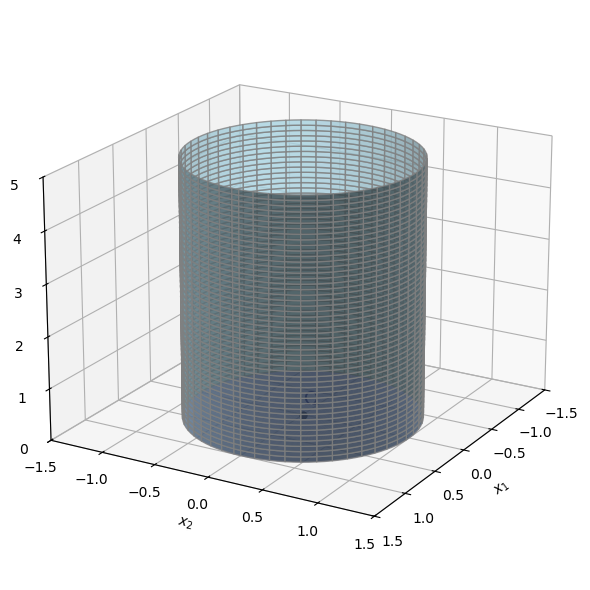

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建网格用于绘制圆柱体底部和侧面
theta = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(0, 5, 50)  # t轴的高度
theta_grid, z_grid = np.meshgrid(theta, z)

# 圆柱体参数
radius = 1
x1 = radius * np.cos(theta_grid)
x2 = radius * np.sin(theta_grid)
t = z_grid

# 初始化图形
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制圆柱体
ax.plot_surface(x1, x2, t, color='lightblue', alpha=0.8, edgecolor='gray')

# 绘制底面阴影 Ω
x1_base = radius * np.cos(theta)
x2_base = radius * np.sin(theta)
ax.plot_trisurf(x1_base, x2_base, np.zeros_like(x1_base), color='blue', alpha=0.4)

# 标注 Ω
ax.text(0, 0, 0.2, r'$\Omega$', fontsize=14, color='navy')

# 设置坐标轴标签
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$t$')

# 设置坐标轴范围和视角
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(0, 5)
ax.view_init(elev=20, azim=30)

# 原点靠近 t 轴的效果
ax.plot([0], [0], [0], marker='o', markersize=5, color='black')

plt.tight_layout()
plt.show()


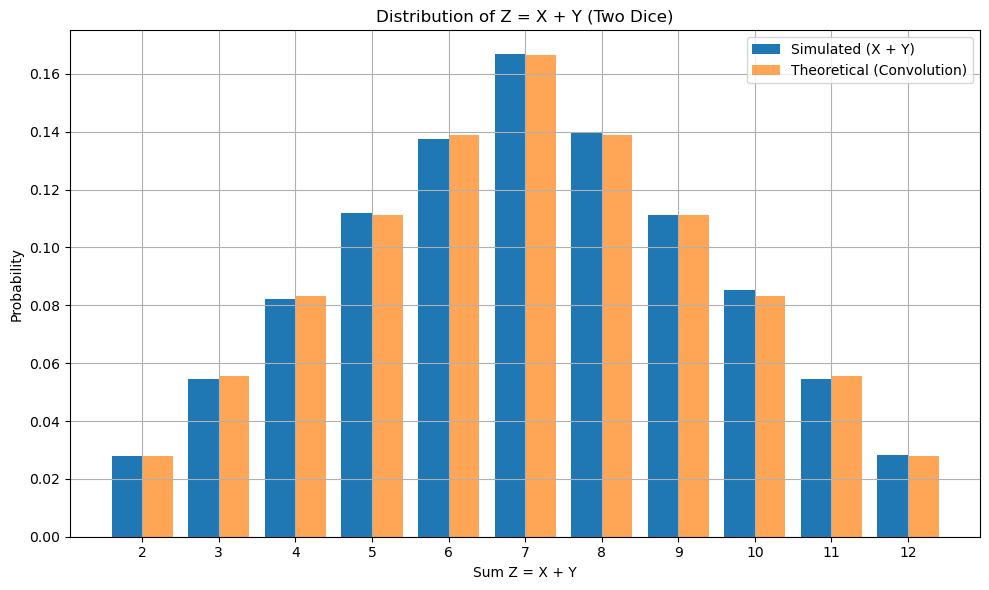

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.signal import convolve

# 模拟次数
N = 100000

# 1. 随机变量相加（模拟）
X = np.random.randint(1, 7, size=N)
Y = np.random.randint(1, 7, size=N)
Z = X + Y

# 2. 统计模拟频率
values, counts = np.unique(Z, return_counts=True)
simulated_probs = counts / N

# 3. 理论分布（离散卷积）
pmf = np.ones(6) / 6  # 单个骰子的概率质量函数
theoretical_pmf = convolve(pmf, pmf)  # 卷积得到 Z 的概率

theoretical_values = np.arange(2, 13)  # 可能的和值范围

# 4. 可视化比较
plt.figure(figsize=(10, 6))
plt.bar(values - 0.2, simulated_probs, width=0.4, label='Simulated (X + Y)')
plt.bar(theoretical_values + 0.2, theoretical_pmf, width=0.4, label='Theoretical (Convolution)', alpha=0.7)
plt.xticks(theoretical_values)
plt.xlabel('Sum Z = X + Y')
plt.ylabel('Probability')
plt.title('Distribution of Z = X + Y (Two Dice)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


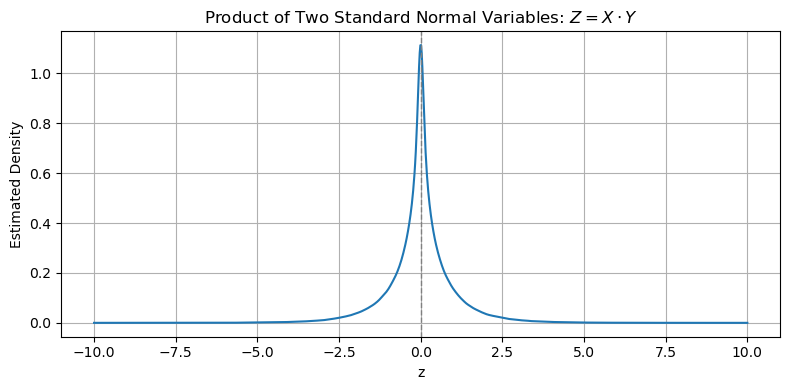

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# 设置随机种子以保证可重复
np.random.seed(42)

# 模拟样本数量
N = 1000000

# 生成两个独立的标准正态变量
X = np.random.normal(0, 1, N)
Y = np.random.normal(0, 1, N)

# 计算乘积 Z = X * Y
Z = X * Y

# 计算核密度估计
kde = gaussian_kde(Z)

# 定义绘图范围
z_vals = np.linspace(-10, 10, 1000)
pdf_vals = kde(z_vals)

# 绘图
plt.figure(figsize=(8, 4))
sns.lineplot(x=z_vals, y=pdf_vals)
plt.title("Product of Two Standard Normal Variables: $Z = X \\cdot Y$")
plt.xlabel("z")
plt.ylabel("Estimated Density")
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


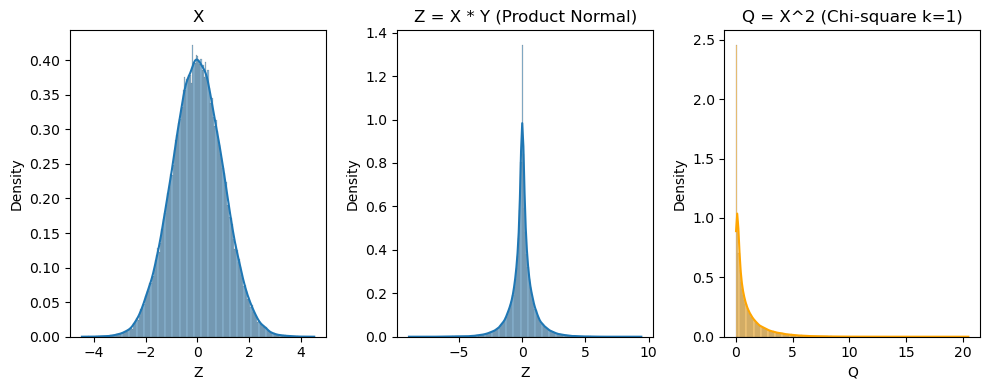

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 模拟样本
N = 100000
X = np.random.normal(0, 1, N)
Y = np.random.normal(0, 1, N)

Z = X * Y          # 正态乘积
Q = X**2           # 卡方 k=1

# 绘图
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.histplot(X, bins=200, stat='density', kde=True)
plt.title("X")
plt.xlabel("Z")

plt.subplot(1, 3, 2)
sns.histplot(Z, bins=200, stat='density', kde=True)
plt.title("Z = X * Y (Product Normal)")
plt.xlabel("Z")

plt.subplot(1, 3, 3)
sns.histplot(Q, bins=200, stat='density', kde=True, color='orange')
plt.title("Q = X^2 (Chi-square k=1)")
plt.xlabel("Q")

plt.tight_layout()
plt.show()
